# Long Short Term Memory(LSTM) based - Stock predicition - - # CPU based


Aim -to predict the Closing_Price_Prediction using past 60 day stock price.

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn')


C:\Users\MEGHA\AppData\Local\Temp\ipykernel_23280\970656428.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Data prep

Works on Yahoo based data. (Doesnt contain Indian stock values) 

In [2]:
ticker = 'NVDA'  #amazon  start=   end = current date

In [3]:
#Get stock quote - we import just the opening and closing Prices of stock, over 5 years duration

df=pd.read_csv("NVDA.csv")    #YYYY-MM-DD
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-02,45.812500,46.197498,45.380001,45.750000,45.439285,44092000
1,2019-04-03,46.250000,47.750000,46.200001,47.154999,46.834743,78350400
2,2019-04-04,47.000000,47.492500,46.432499,47.064999,46.745346,45737600
3,2019-04-05,47.500000,47.912498,47.132500,47.737499,47.413288,48174400
4,2019-04-08,47.430000,48.200001,47.187500,47.947498,47.621857,42419200
...,...,...,...,...,...,...,...
1254,2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
1255,2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700
1256,2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200
1257,2024-04-01,902.989990,922.250000,892.039978,903.630005,903.630005,45244100


In [4]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-02,45.812500,46.197498,45.380001,45.750000,45.439285,44092000
2019-04-03,46.250000,47.750000,46.200001,47.154999,46.834743,78350400
2019-04-04,47.000000,47.492500,46.432499,47.064999,46.745346,45737600
2019-04-05,47.500000,47.912498,47.132500,47.737499,47.413288,48174400
2019-04-08,47.430000,48.200001,47.187500,47.947498,47.621857,42419200
...,...,...,...,...,...,...
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200


In [5]:
df.shape

(1259, 6)

In [6]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

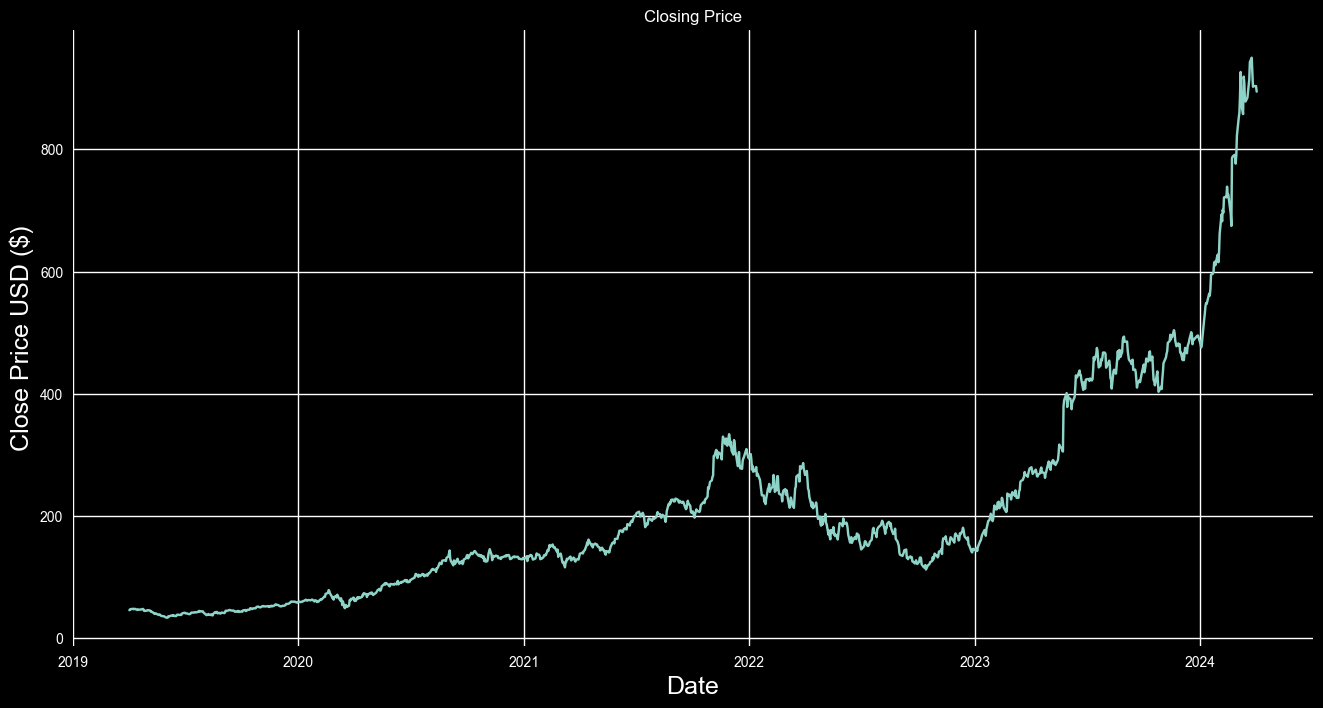

In [7]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
# Extracting the closing prices of each day
FullData=df[['Close']].values
print(FullData[0:5])
 
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[45.75    ]
 [47.154999]
 [47.064999]
 [47.737499]
 [47.947498]]
### After Normalization ###


array([[0.01342498],
       [0.01495786],
       [0.01485967],
       [0.01559338],
       [0.01582249]])

In [9]:
# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])
 
print('###################')
 
# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[893.97998 ]
 [903.719971]
 [914.349976]
 [942.890015]
 [950.02002 ]
 [925.609985]
 [902.5     ]
 [903.559998]
 [903.630005]
 [894.52002 ]]
###################
Scaled Prices
[0.9388593  0.94948581 0.96108333 0.99222104 1.         0.97336821
 0.94815479 0.94931127 0.94938765 0.93944849]


In [10]:
# Multi step data preparation
 
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=8 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(1241, 10, 1)
### Output Data Shape ###
(1241, 8)


In [11]:
# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(1236, 10, 1)
(1236, 8)

#### Testing Data shape ####
(5, 10, 1)
(5, 8)


In [12]:

# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.01342498]
 [0.01495786]
 [0.01485967]
 [0.01559338]
 [0.01582249]
 [0.01513242]
 [0.01590705]
 [0.0157543 ]
 [0.01533699]
 [0.01388866]]
====>
[0.01484603 0.01459509 0.01432507 0.01491695 0.01551701 0.01565338
 0.01449145 0.01208575]
####################
[[0.01495786]
 [0.01485967]
 [0.01559338]
 [0.01582249]
 [0.01513242]
 [0.01590705]
 [0.0157543 ]
 [0.01533699]
 [0.01388866]
 [0.01484603]]
====>
[0.01459509 0.01432507 0.01491695 0.01551701 0.01565338 0.01449145
 0.01208575 0.01242397]
####################


In [13]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
248/248 [==============================] - 4s 8ms/step - loss: 0.0354
Epoch 2/100
248/248 [==============================] - 2s 8ms/step - loss: 0.0080
Epoch 3/100
248/248 [==============================] - 2s 8ms/step - loss: 0.0022
Epoch 4/100
248/248 [==============================] - 2s 8ms/step - loss: 0.0012
Epoch 5/100
248/248 [==============================] - 3s 12ms/step - loss: 8.7715e-04
Epoch 6/100
248/248 [==============================] - 3s 13ms/step - loss: 8.4300e-04
Epoch 7/100
248/248 [==============================] - 3s 12ms/step - loss: 7.7975e-04
Epoch 8/100
248/248 [==============================] - 3s 12ms/step - loss: 7.5391e-04
Epoch 9/100
248/248 [==============================] - 3s 12ms/step - loss: 7.5148e-04
Epoch 10/100
248/248 [==============================] - 3s 12ms/step - loss: 7.5984e-04
Epoch 11/100
248/248 [==============================] - 3s 11ms/step - loss: 6.4111e-04
Epoch 12/100
248/248 [==============================] - 3s 11

248/248 [==============================] - 3s 11ms/step - loss: 4.0042e-04
Epoch 95/100
248/248 [==============================] - 3s 11ms/step - loss: 3.7748e-04
Epoch 96/100
248/248 [==============================] - 3s 11ms/step - loss: 3.7224e-04
Epoch 97/100
248/248 [==============================] - 3s 11ms/step - loss: 3.8955e-04
Epoch 98/100
248/248 [==============================] - 3s 11ms/step - loss: 4.2061e-04
Epoch 99/100
248/248 [==============================] - 3s 11ms/step - loss: 3.6464e-04
Epoch 100/100
248/248 [==============================] - 3s 11ms/step - loss: 3.9618e-04
############### Total Time Taken:  5 Minutes #############


In [15]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 0s 289ms/step
#### Predicted Prices ####
[[913.447   905.3414  920.0177  908.95605 915.0144  948.6326  952.2739
  948.01495]
 [904.62634 894.4304  910.4644  899.6806  903.651   940.3225  944.7205
  941.33057]
 [896.8309  884.1563  901.8022  891.1013  892.8677  933.0711  938.3082
  935.8783 ]
 [893.65137 879.2295  897.8269  887.2817  887.5821  929.795   935.6059
  934.0583 ]
 [900.38544 884.69946 903.38617 893.1293  892.8089  934.86456 940.9991
  940.71783]]

#### Original Prices ####
[[879.440002 878.369995 884.549988 893.97998  903.719971 914.349976
  942.890015 950.02002 ]
 [878.369995 884.549988 893.97998  903.719971 914.349976 942.890015
  950.02002  925.609985]
 [884.549988 893.97998  903.719971 914.349976 942.890015 950.02002
  925.609985 902.5     ]
 [893.97998  903.719971 914.349976 942.890015 950.02002  925.609985
  902.5      903.559998]
 [903.719971 914.349976 942.890015 950.02002  925.609985 902.5
  903.559998 903.630005]]


### Predict the stock price for the next 8 days

In [19]:
import numpy as np
Last10DaysPrices = np.array([893.97998,
903.719971,
914.349976,
942.890015,
950.02002,
925.609985,
902.5,
903.559998,
903.630005,
894.52002
])
Last10DaysPrices = Last10DaysPrices.reshape(-1, 1)
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(Last10DaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next8DaysPrice = regressor.predict(X_test)
print(Next8DaysPrice)
 
Next8DaysPrice = DataScaler.inverse_transform(Next8DaysPrice)
Next8DaysPrice

1/1 [==============================] - 0s 24ms/step
[[0.9471204  0.93438196 0.954516   0.9399918  0.9443261  0.9900138
  0.9950468  0.98965657]]


array([[901.55194, 889.87616, 908.33057, 895.018  , 898.9907 , 940.8669 ,
        945.48   , 940.5395 ]], dtype=float32)